In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [202]:
df = pd.read_csv('RASFF_data.csv')

In [3]:
df

,Category,Product,Subject,Date,Class,Decision
0,Herbs and spices,food,Mouse droppings in red clover tea,16 JUN 2023,information notification for follow-up,not serious
1,Other food product / mixed,food,Undeclared sulphite in yellow raisins,16 JUN 2023,alert notification,serious
2,Other food product / mixed,food,Allergens not mentioned on the label of noodle...,16 JUN 2023,information notification for attention,serious
3,Food contact materials,food contact material,Unauthorised use of plastic materials and bamb...,16 JUN 2023,information notification for follow-up,not serious
4,"Dietetic foods, food...",food,Improper Official Certificate(s) for food supp...,16 JUN 2023,border rejection notification,not serious
...,...,...,...,...,...,...
201795,Fruits and vegetables,food,Chlorpyrifos in Rambutan from Vietnam,7 MAR 2022,information notification for attention,undecided
201796,Fish and products thereof,food,Mercurio en Pagrus Pagrus de Marruecos.Presenc...,7 MAR 2022,information notification for attention,serious
201797,Non-alcoholic beverages,food,Too high content of E200 and E210 in non-alcoh...,7 MAR 2022,information notification for follow-up,undecided
201798,"Nuts, nut products and seeds",food,Pyrrolizidine alkaloids in cumin seeds from Tu...,7 MAR 2022,border rejection notification,serious


# Quick EDA

__Let´s see a data summary using skim__

* NAN values
* Data Type
* Number of values
* etc...

In [9]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 201800 │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 6      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Category                  │       0 │          0 │                          3.7 │                   740000 │  │
│ │ Product                   │       0 │          0 │                          3.7 │                   740000 │  │
│ │ Subject                   │       0 │          0 │                          3.7 │                   740000 │  │
│ │ Date                      │       0 │          0 │                          3.7 │                   740000 │  │
│ │ Class                     │       0 │          0 │                          3.7 │                   740000 │  │
│ │ Decision                  │       0 │          0 │                          3.7 │                   740000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201800 entries, 0 to 201799
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Category  201800 non-null  object
 1   Product   201800 non-null  object
 2   Subject   201800 non-null  object
 3   Date      201800 non-null  object
 4   Class     201800 non-null  object
 5   Decision  201800 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


In [11]:
# data shape (rows x columns)
df.shape

(201800, 6)

In [200]:
print('There are {} RASFF notifications in between {} and {}'.format(df.shape[0],df['Date'].iloc[0],df['Date'].iloc[-1]))

There are 201800 RASFF notifications in between 16 JUN 2023 and 7 MAR 2022


In [18]:
# Number of categories for each column
columns = df.columns

for i in columns:
    
    print('There are {} different categories in the column {}'.format(df[i].nunique(),i))

There are 35 different categories in the column Category
There are 6 different categories in the column Product
There are 4978 different categories in the column Subject
There are 353 different categories in the column Date
There are 5 different categories in the column Class
There are 6 different categories in the column Decision


Date

In [177]:
df['Date'].iloc[0]

'16 JUN 2023'

In [176]:
df['Date'].iloc[-1]

'7 MAR 2022'

In [178]:
print('RASFF Notificacions between {} and {}'.format(df['Date'].iloc[0],df['Date'].iloc[-1]))

RASFF Notificacions between 16 JUN 2023 and 7 MAR 2022


In [ ]:
df[]

In [27]:
# Let´s create a column for Day, Month and Year
df[['Day', 'Month', 'Year']] = df['Date'].str.split(expand=True)

In [29]:
df.head()

,Category,Product,Subject,Date,Class,Decision,Day,Month,Year
0,Herbs and spices,food,Mouse droppings in red clover tea,16 JUN 2023,information notification for follow-up,not serious,16,JUN,2023
1,Other food product / mixed,food,Undeclared sulphite in yellow raisins,16 JUN 2023,alert notification,serious,16,JUN,2023
2,Other food product / mixed,food,Allergens not mentioned on the label of noodle...,16 JUN 2023,information notification for attention,serious,16,JUN,2023
3,Food contact materials,food contact material,Unauthorised use of plastic materials and bamb...,16 JUN 2023,information notification for follow-up,not serious,16,JUN,2023
4,"Dietetic foods, food...",food,Improper Official Certificate(s) for food supp...,16 JUN 2023,border rejection notification,not serious,16,JUN,2023


In [30]:
# Let´s analyse the year
df['Year'].value_counts()

2023    113890
2022     87910
Name: Year, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201800 entries, 0 to 201799
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Category  201800 non-null  object
 1   Product   201800 non-null  object
 2   Subject   201800 non-null  object
 3   Date      201800 non-null  object
 4   Class     201800 non-null  object
 5   Decision  201800 non-null  object
 6   Day       201800 non-null  object
 7   Month     201800 non-null  object
 8   Year      201800 non-null  object
dtypes: object(9)
memory usage: 13.9+ MB


In [38]:
df[df['Year']=='2023']['Month'].value_counts()

APR    84487
JUN    10108
MAR     7193
FEB     6212
MAY     3728
JAN     2162
Name: Month, dtype: int64

In [41]:
df[df['Year']=='2023'].shape

(113890, 9)

In [39]:
df[df['Year']=='2022']['Month'].value_counts()

MAR    65768
DEC     6645
NOV     4646
OCT     4567
JUN     2617
APR     1014
SEP      951
JUL      666
AUG      527
MAY      509
Name: Month, dtype: int64

##  Category

In [114]:
df['Category'].value_counts()

Fruits and vegetables               41897
Nuts, nut products and seeds        26408
Dietetic foods, food...             20300
Herbs and spices                    15842
Fish and products thereof           11877
Food contact materials              11793
Cereals and bakery products         10319
Other food product / mixed           8964
Milk and milk products               8903
Feed materials                       7818
Bivalve molluscs and products...     5717
Meat and meat products (other...     5468
Poultry meat and poultry meat...     5446
Prepared dishes and snacks           4956
Food additives and flavourings       3668
Cocoa and cocoa preparations,...     2114
Crustaceans and products thereof     2037
Confectionery                        1393
Eggs and egg products                1238
Pet food                             1179
Soups, broths, sauces and...         1132
Cephalopods and products thereof      965
Fats and oils                         700
Feed premixtures                  

In [54]:
categ_count = df.groupby('Category').agg(Count=('Category','count'))
categ_count.reset_index(inplace=True)
categ_count = categ_count.sort_values(by='Count',ascending=False)
categ_count

,Category,Count
18,Fruits and vegetables,41897
27,"Nuts, nut products and seeds",26408
9,"Dietetic foods, food...",20300
20,Herbs and spices,15842
15,Fish and products thereof,11877
17,Food contact materials,11793
4,Cereals and bakery products,10319
28,Other food product / mixed,8964
24,Milk and milk products,8903
13,Feed materials,7818


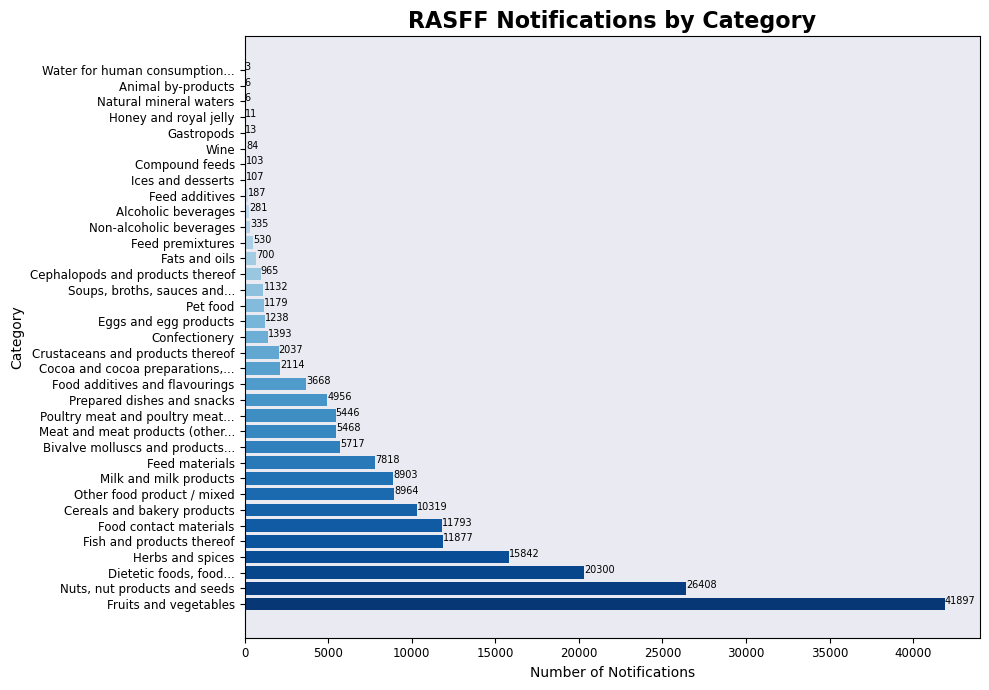

In [157]:
plt.figure(figsize=(10,7))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plt.barh(categ_count['Category'],categ_count['Count'], color = sns.color_palette('Blues_r',len(categ_count)))

plt.title('RASFF Notifications by Category', fontweight='bold', fontsize=16)

plt.xlabel('Number of Notifications', fontsize=10)
plt.xticks(fontsize=8.5)

plt.ylabel('Category',fontsize=10)
plt.yticks(fontsize=8.5)

for i, v in enumerate(categ_count['Count']):
    plt.text(v+1, i, str(v), color='black', fontsize=7)
    
plt.tight_layout()

plt.show()

## Product

In [119]:
df['Product'].value_counts()

food                                        179843
food contact material                        12035
feed                                          9798
other                                          114
plants, plant products and other objects         9
animals                                          1
Name: Product, dtype: int64

In [123]:
prod_count = df.groupby('Product').agg(Count=('Product','count'))
prod_count.reset_index(inplace=True)
prod_count = prod_count.sort_values(by='Count',ascending=False)
prod_count

,Product,Count
2,food,179843
3,food contact material,12035
1,feed,9798
4,other,114
5,"plants, plant products and other objects",9
0,animals,1


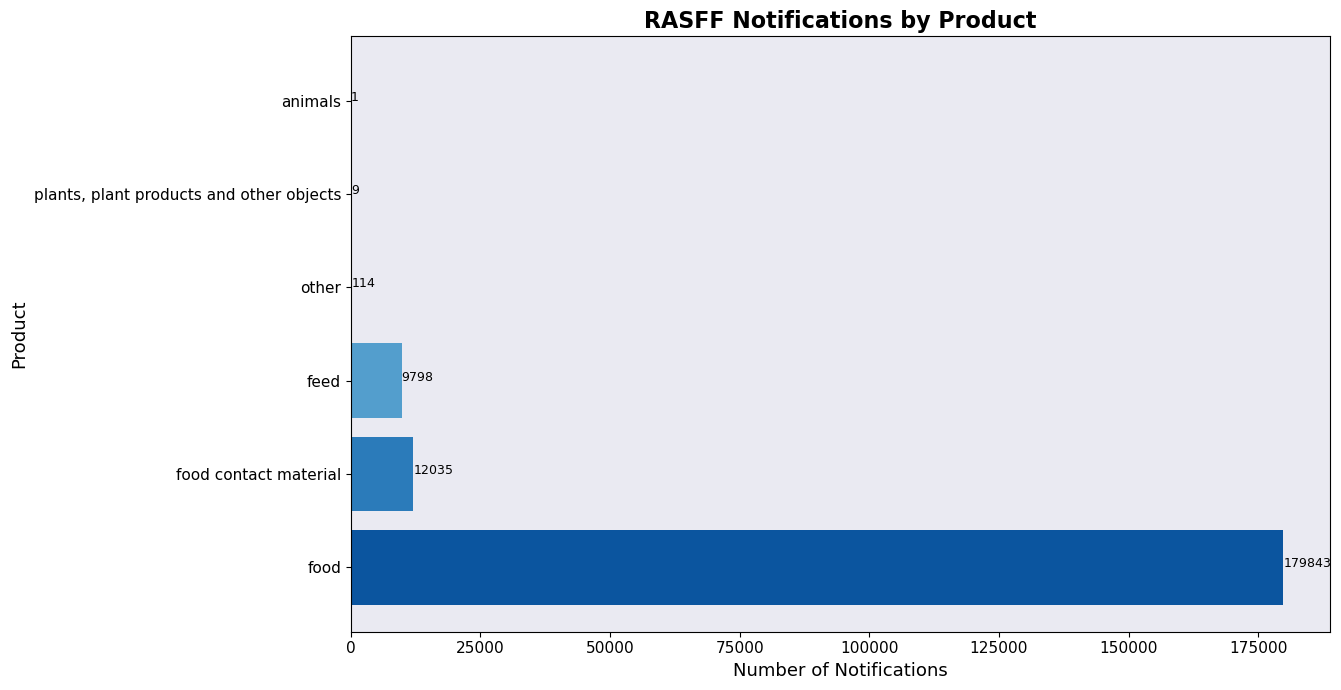

In [168]:
plt.figure(figsize=(13.5,7))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plt.barh(prod_count['Product'],prod_count['Count'],color = sns.color_palette('Blues_r',len(prod_count)))

plt.title('RASFF Notifications by Product', fontweight='bold', fontsize=16)

plt.xlabel('Number of Notifications', fontsize=13)
plt.xticks(fontsize=11)

plt.ylabel('Product',fontsize=13)
plt.yticks(fontsize=11)

for i, v in enumerate(prod_count['Count']):
    plt.text(v+1, i, str(v), color='black', fontsize=9)
    
plt.tight_layout()

plt.show()

## Subject

In [150]:
df['Subject'].value_counts()

Aflatoxins in peanuts from Egypt                                                                                                                          2730
Salmonella spp. in tahini from Jordan                                                                                                                     2656
Residues of methomyl and mepiquat chloride in angled luffa (Luffa acutangula)                                                                             2655
Salmonella spp in frozen precooked mussels from Chile                                                                                                     2655
Milk with a sour taste due to bacterial growth                                                                                                            2655
                                                                                                                                                          ... 
Ruptura de la cadena de frío en Litopenaeus va

In [151]:
# Word Cloud
text = ' '.join(sub_name for sub_name in df['Subject'])
print('There are {} words in the combination of all the substances names'.format(len(text)))

There are 12639935 words in the combination of all the substances names


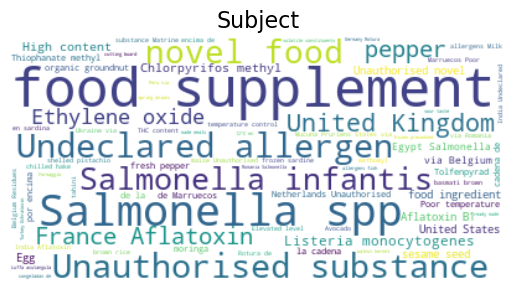

In [152]:
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Subject', fontweight=True, fontsize=16)
plt.show()

## Class

In [153]:
df['Class'].value_counts()

border rejection notification             74871
alert notification                        55912
information notification for attention    48371
information notification for follow-up    22645
non-compliance notification                   1
Name: Class, dtype: int64

In [155]:
class_count = df.groupby('Class').agg(Count=('Class','count'))
class_count.reset_index(inplace=True)
class_count = class_count.sort_values(by='Count',ascending=False)
class_count

,Class,Count
1,border rejection notification,74871
0,alert notification,55912
2,information notification for attention,48371
3,information notification for follow-up,22645
4,non-compliance notification,1


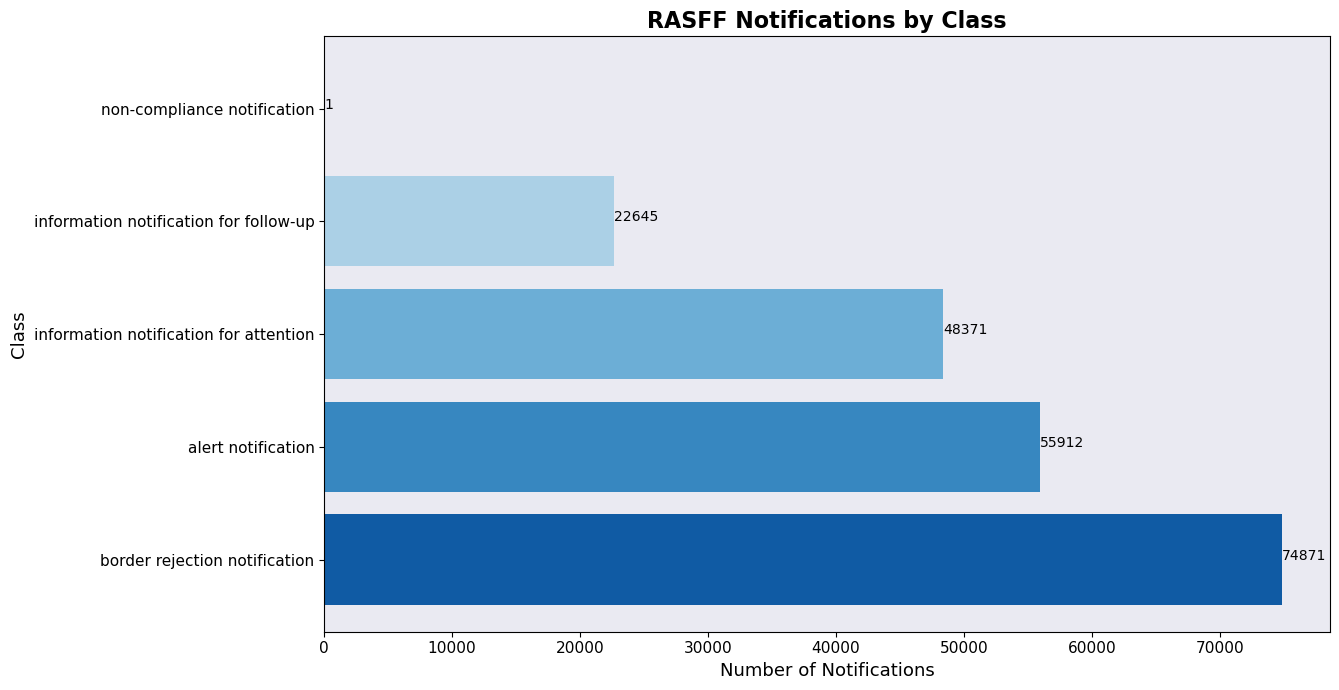

In [167]:
plt.figure(figsize=(13.5,7))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plt.barh(class_count['Class'],class_count['Count'],color = sns.color_palette('Blues_r',len(class_count)))

plt.title('RASFF Notifications by Class', fontweight='bold', fontsize=16)

plt.xlabel('Number of Notifications', fontsize=13)
plt.xticks(fontsize=11)

plt.ylabel('Class',fontsize=13)
plt.yticks(fontsize=11)

for i, v in enumerate(class_count['Count']):
    plt.text(v+1, i, str(v), color='black', fontsize=10)
    
plt.tight_layout()

plt.show()

## Decision

In [179]:
df['Decision'].value_counts()

serious                117649
undecided               30698
not serious             22598
potential risk          14222
potentially serious     12658
no risk                  3975
Name: Decision, dtype: int64

In [181]:
dec_count = df.groupby('Decision').agg(Count=('Decision','count'))
dec_count.reset_index(inplace=True)
dec_count = dec_count.sort_values(by='Count',ascending=False)
dec_count

,Decision,Count
4,serious,117649
5,undecided,30698
1,not serious,22598
2,potential risk,14222
3,potentially serious,12658
0,no risk,3975


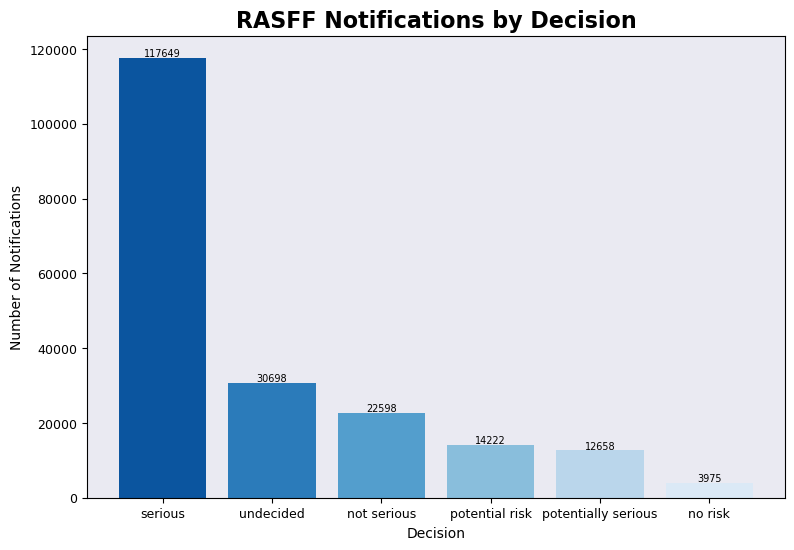

In [197]:
plt.figure(figsize=(9,6))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plot = plt.bar(dec_count['Decision'],dec_count['Count'],color = sns.color_palette('Blues_r',len(dec_count)))

plt.title('RASFF Notifications by Decision', fontweight='bold', fontsize=16)

plt.xlabel('Decision', fontsize=10)
plt.xticks(fontsize=9)

plt.ylabel('Number of Notifications',fontsize=10)
plt.yticks(fontsize=9)

for i in plot.patches:
    plt.annotate(
        i.get_height(),
        (i.get_x() + i.get_width() / 2, i.get_height()),
        ha="center",
        va="baseline",
        fontsize=7,
        color="black",
        xytext=(0, 1),
        textcoords="offset points"
    )

plt.show()